# Classification Model for Rainfall Prediction
   ------------------------------------------------------------------

The problem statement is to create a machine learning model using various classification models which will help the newspaper company *The Daily Buzz* in predicting rainfall for the upcoming days to be of service to the community by and large.

Rainfall has been one of the meteorological phenomena that has a major influence on our lives. It can serve as a blessing for the agricultural sector but an incessant amount of rainfall can cause crop destruction and property damage if preventive measures are not taken before-hand.

Rainfall forecasting or prediction is the process of using various techniques for predicting the time, location and the amount of precipitation that may take place in an area over a period of time. This can benefit many fields, including agriculture, transportation, disaster management and more, though, performing rainfall prediction is not at all an easy task because a high number of variables are involved and the data may be difficult to gather or the data gathered might be incorrect due to the sensitive forecasting tools. Also, the complexity of rainfall such as its non-linearity makes it difficult to predict as errors may occur resulting in the predictions not much accurate. 

Machine learning can be a life-saver in this situation.It can help create models that can overcome all the shortcomings and can process large amounts of data discovering hidden patterns from them and also, make predictions on new data to a much higher degree of accuracy. This can help in mitigating any drastic effects of rainfall and also any minor inconveniences of people.

In this project, we will use a dataset containing the weather information of Sydney of 10 years and use it to build a classification model that can predict rainfall with a high degree of accuracy. We will apply different classification algorithms to create accurate predictions of future weather conditions.
**************************************************************************

We will solve this by performing the below mentioned tasks:

**Dataset Preview:**
- Read the dataset 
- View a sample of the dataset

**Data Preprocessing:**
- Understand the basic information, summary statistics for numerical and categorical variables.
- Check for missing values and perform imputation (if any)
- Check for outliers andd treat them (if any)
- Remove irrelevant columns
- Convert categorical variables into numerical variables.
- Perform Correlation analysis to find correlations between predictor variables and response variable

**Train-Test Split:**
- Split the whole dataset into 2 parts, 80% for training the model and 20% for testing

**Model Building:**
- Try different available classification models
- Find the models' confusion matrices and accuracy score values
- Display confusion matrix and ROC curve of each model
- Display classification report of each model including precision and recall

**Model Evaluation:**
- Select the model with highest accuracy score

In [813]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for splitting data into train and test sets
from sklearn.model_selection import train_test_split

#for standardizing predictor variables
from sklearn.preprocessing import StandardScaler    

#importing all classification models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#plotting Classification Tree
from IPython.display import Image   
import pydotplus

#to check model evaluation metrics on test data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, auc, roc_curve

#for plotting the evaluated performance metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report

## Dataset Preview
**********************************

In [814]:
#reading data into DataFrame 'df'
#using 'read_excel()' to read an Excel workbook 
#header = 0 as headers are in the 0th column 

df = pd.read_excel('Downloads/sydney_rain prediction.xlsx', header = 0)

In [815]:
#view a sample of the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Data Preprocessing
**********************************

Data preprocessing is the most important part of the process of building a Machine Learning model. The raw data that we start working on has to be cleaned thoroughly before using it for training the model because *Garbage Input, Garbage Output*. 

Going by this principle we first check for missing values and impute them with harmless values like mean, median or mode according to their types i.e for numerical columns we impute missing values with mean but if distribution is skewed we use median as the mean gets heavily influenced by outliers. For categorical values, we perform imputation with mode i.e. the highest occuring class or category.

We then, check for outliers in the data using summary statistics. We need to check the following things:
- Difference between the `mean` and `median` of the columns
- Value of `standard deviation`of each column
- The distribution of values in the columns that can be found by checking the values of `min` and `max` including the `percentile` values which can suggest uneven distribution i.e. skewness in the data
If we find skewness in the data we check for outliers which need to be removed to avoid overfitting/underfitting in the data and also to obtain a greater accuracy in the performance of the model.

Next we remove the columns that are not relevant in the model training such as column having string values and single unique values which don't help in the analysis of the data for model training.

The columns containing different categories/ classes i.e. the categorical variable columns need to be converted into numerical value columns because the machine learning models we are going to use can not handle such data. So we use `one-hot encoding` to represent categorical variables also called `proxy` variables.

At last, we perform correlation analysis that is a part of `bivariate analysis` to measure the strength of relationships of pairs of variables and computes their correlation coefficients. A correlation coefficient of 1 denotes 100% positive correlation and -1 denotes 100% negative correlation. A 0 value means there is no relationship between the two assessed variables. So, if there is a correlation coefficient of near 0 for an independent variable and the dependent variable, that would mean that the independent vaiable does not affect he dependent variable and we can discard it as such variable won't be useful for our analysis.

In [816]:
#provides a summary of all the columns, the column counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

***We can see that there are missing values in many of the numerical columns and also one categorical column `RainToday`. We will impute them accordingly.***

In [817]:
#descriptive statistics of numerical variables
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


***We can see no major difference in the mean and median values of most of the columns and the distribution of every column's values, found by min, max and percentile values show their evenness except for the `Rainfall` column, which appears to be skewed a bit. Hence, we will check for outliers in the `Rainfall` column.***

In [818]:
#imputing missing values in numerical columns with mean
#inplace=True changes the original DataFrame without making a copy of it

df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

#imputing missing values of 'Rainfall' column with median as it has some skewness
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)

#imputing missing values in 'RainToday' column by mode of the column
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

***Now, there are no missing values in any of the columns.***

In [820]:
#removing 'Location' column because it has single unique value 'Sydney'
#removing 'Date' column because it is not useful for our analysis
del df['Location']
del df['Date']

In [821]:
#creating dummy variables for categorical variables 'RainToday' and 'RainTomorrow'
#'drop_first=True' creates k-1 dummies and 'dtype=int' changes their type to int from boolean
df = pd.get_dummies(df, drop_first = True, dtype = int)

In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   int32  
 14  RainTomorrow_Yes  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


In [823]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


***Now the unnecessary columns have been deleted and the categorical variables have been converted into numerical ones.***

In [824]:
#setting default plot size and style of all plots to white
sns.set(rc={'figure.figsize' : (7, 6)}, style="white")

<Axes: xlabel='Rainfall', ylabel='Count'>

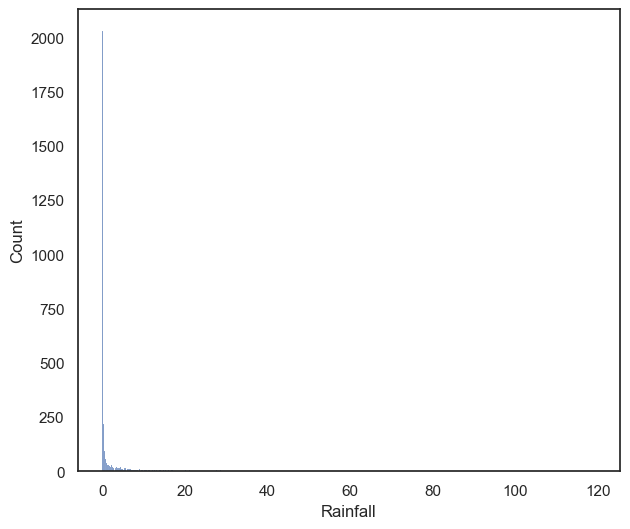

In [825]:
#check distribution of 'Rainfall' column
sns.histplot(df.Rainfall)

<Axes: >

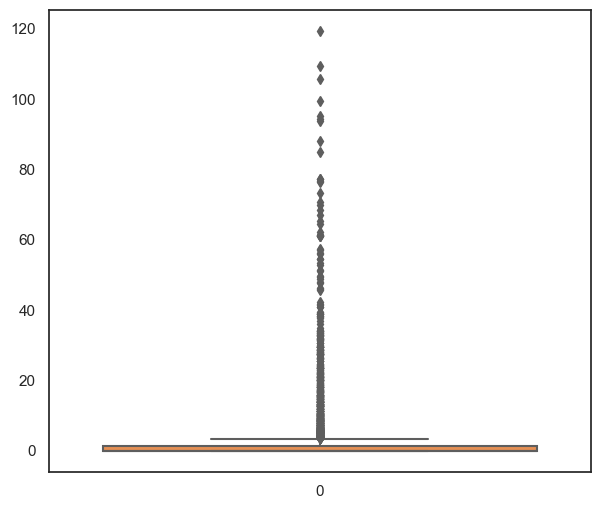

In [826]:
#plotting boxplot of 'Rainfall' column
sns.boxplot(df['Rainfall'], palette = 'Oranges')

***We see that some values can be considered as extreme stretching upto almost 120 when the maximum of the values are 0. So we can use the `Capping` method to scale down the outliers a bit so that they don't affect the model.***

In [827]:
#setting an upper value of 99th percentile(P99) of the 'Rainfall' column values
uv = np.percentile(df.Rainfall, 99)

In [828]:
#identify rows where values more than 99th percentile(outliers)
df[df.Rainfall>uv] 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,19.7,25.7,77.4,5.187432,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1
218,11.8,14.2,62.2,5.187432,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1
633,14.4,17.0,73.2,5.187432,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1
737,20.2,25.0,77.4,7.400000,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1
743,21.4,25.5,70.0,9.400000,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1
855,12.5,20.5,61.4,1.000000,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0
1140,18.8,23.5,99.4,5.187432,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1
1182,13.9,19.9,65.2,5.187432,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1
1232,8.7,18.5,76.8,5.187432,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1
1234,11.3,13.9,88.2,5.187432,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1


In [829]:
#changing values more than 1.5 times P99 to 1.5 times P99
df.Rainfall[df.Rainfall > 1.5*uv] = 1.5*uv

C:\Users\user\AppData\Local\Temp\ipykernel_20460\2194604006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[df.Rainfall > 1.5*uv] = 1.5*uv


In [830]:
df[df.Rainfall>uv] 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,19.7,25.7,77.400,5.187432,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1
218,11.8,14.2,62.200,5.187432,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1
633,14.4,17.0,73.200,5.187432,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1
737,20.2,25.0,77.400,7.400000,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1
743,21.4,25.5,70.000,9.400000,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1
855,12.5,20.5,61.400,1.000000,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0
1140,18.8,23.5,78.444,5.187432,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1
1182,13.9,19.9,65.200,5.187432,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1
1232,8.7,18.5,76.800,5.187432,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1
1234,11.3,13.9,78.444,5.187432,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1


<Axes: >

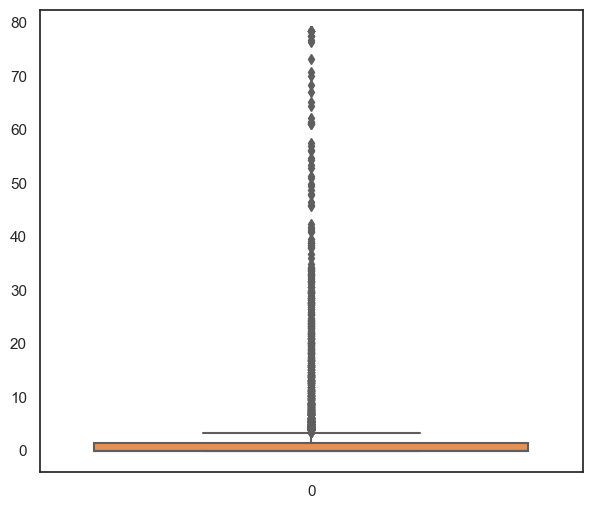

In [831]:
#sns.set(rc={'figure.figsize' : (7, 6)}, style= 'white')
sns.boxplot(df.Rainfall, palette='Oranges')

***We can see that the values more than 1.5 times P99 i.e. `78.44` have been changed to 78.44 and the boxplot now ranges upto `80` instead of 120. It means we were successful in scaling down the extreme values of the 'Rainfall' column a bit.***

***A multiplier of `1.5` was chosen as it was an optimum value that compresses the higher values a bit but not too much that we miss some valuable insights from the data.***

***Now let us create the boxplots of other variables as well to check for any extremities.***

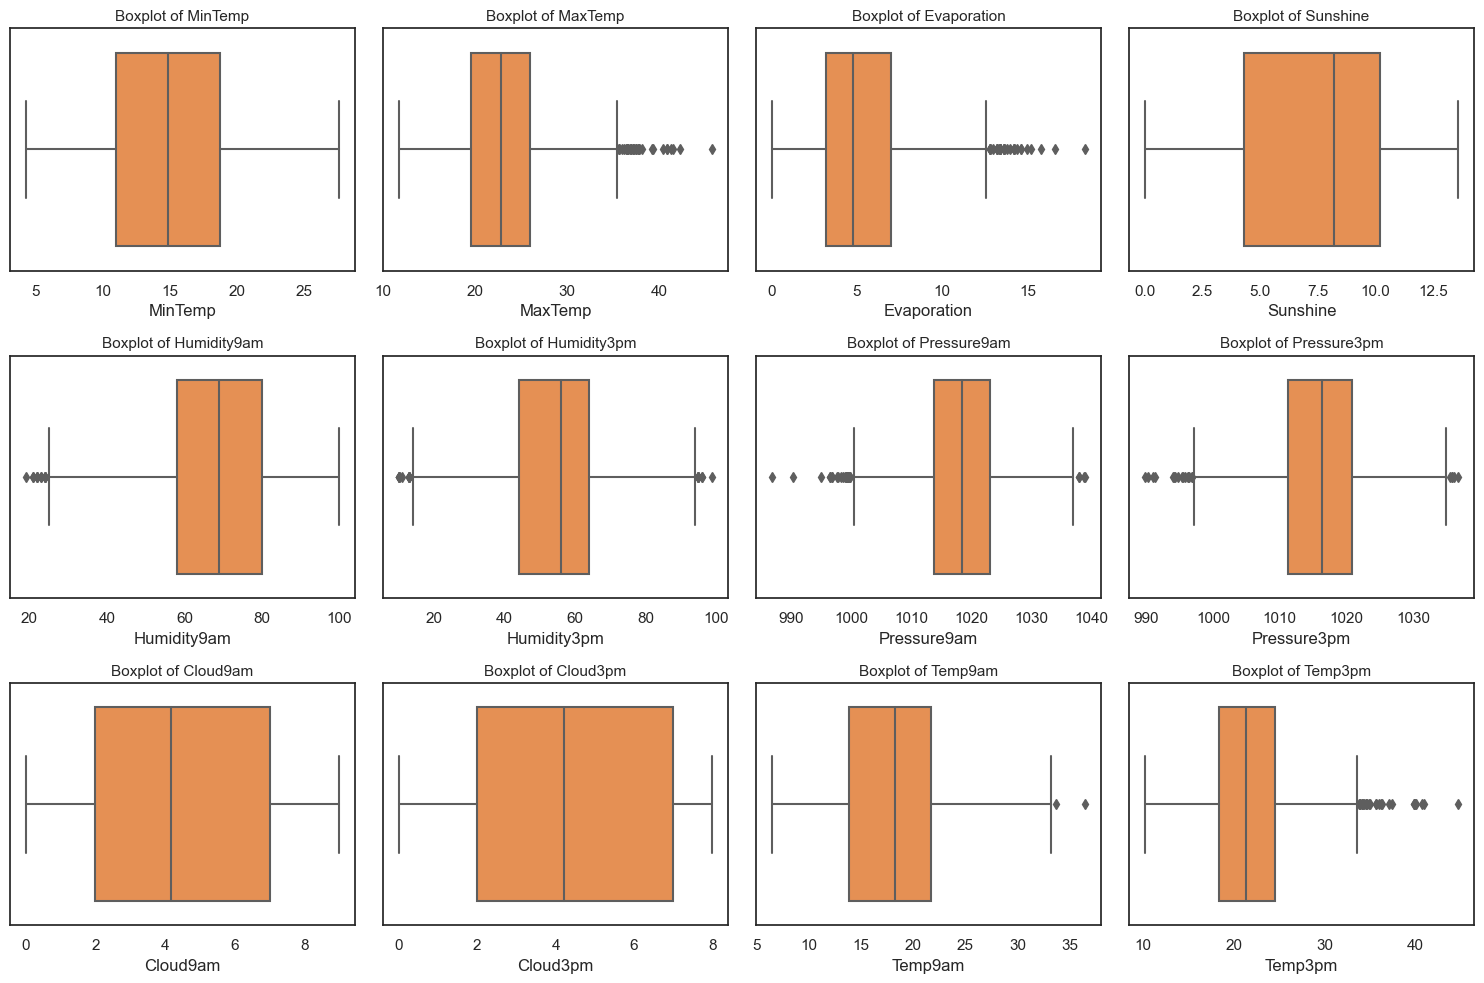

In [832]:
#creating subplots of boxplot

columns_to_exclude = ['Rainfall','RainToday_Yes','RainTomorrow_Yes']
data = df.drop(columns=columns_to_exclude)

#sets up a 3x4 grid of subplots
#fig is the overall figure and axes is an array of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

#flatten axes array into a 1-dimensional array for easy iteration
axes = axes.flatten()

#loop through each variable and create a boxplot
#zip()- pairs each column name with its corresponding subplot axis
#enumerate()- returns tuples containing pair of column name and subplot axis
for i, (variable, ax) in enumerate(zip(data.columns, axes)):
    sns.boxplot(x=data[variable], palette='Oranges', ax=ax)
    ax.set_title(f'Boxplot of {variable}', fontsize=11)

#adjusts the layout to prevent overlapping of subplots
plt.tight_layout()

#show the plot
plt.show()

***We will create bar plots of categorical variables to check for single unique values as that will not be relevant to train the model.***

<Axes: xlabel='RainToday_Yes', ylabel='count'>

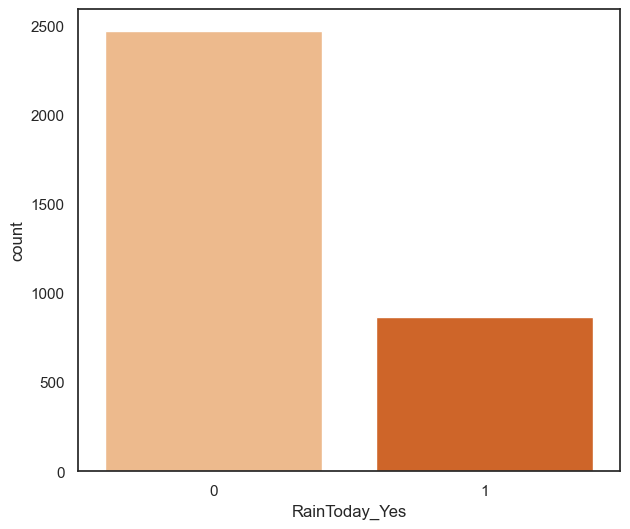

In [833]:
sns.countplot(df, x= 'RainToday_Yes', palette = 'Oranges')

<Axes: xlabel='RainTomorrow_Yes', ylabel='count'>

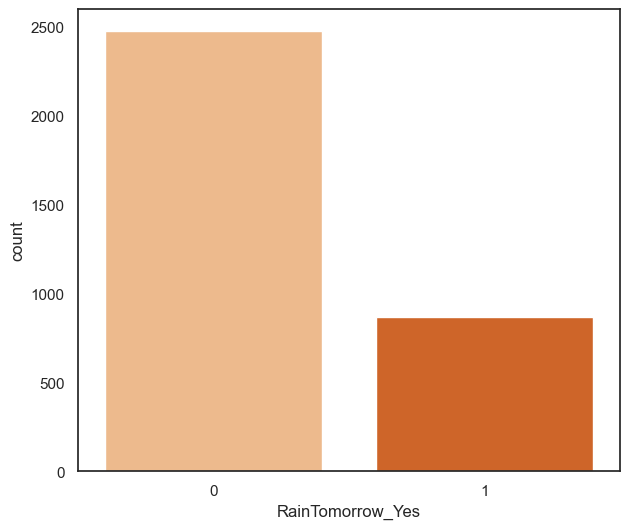

In [834]:
sns.countplot(df, x= 'RainTomorrow_Yes', palette = 'Oranges')

***We saw that all classes or categories of the above categorical variables are in sufficient numbers. No column has values of only one class.***

***In the following code, we draw a heatmap over the correlation matrix of the variables that gives us an insight of the relationship between the pairs of predictor variables and also with response variable to check for multi-collinearity, i.e. if the pairs of variables fluctuate together or not. That will make it challenging to discern the individual effects on the response variable and one of them should be removed.***

Text(0.5, 1.0, 'Correlation Matrix')

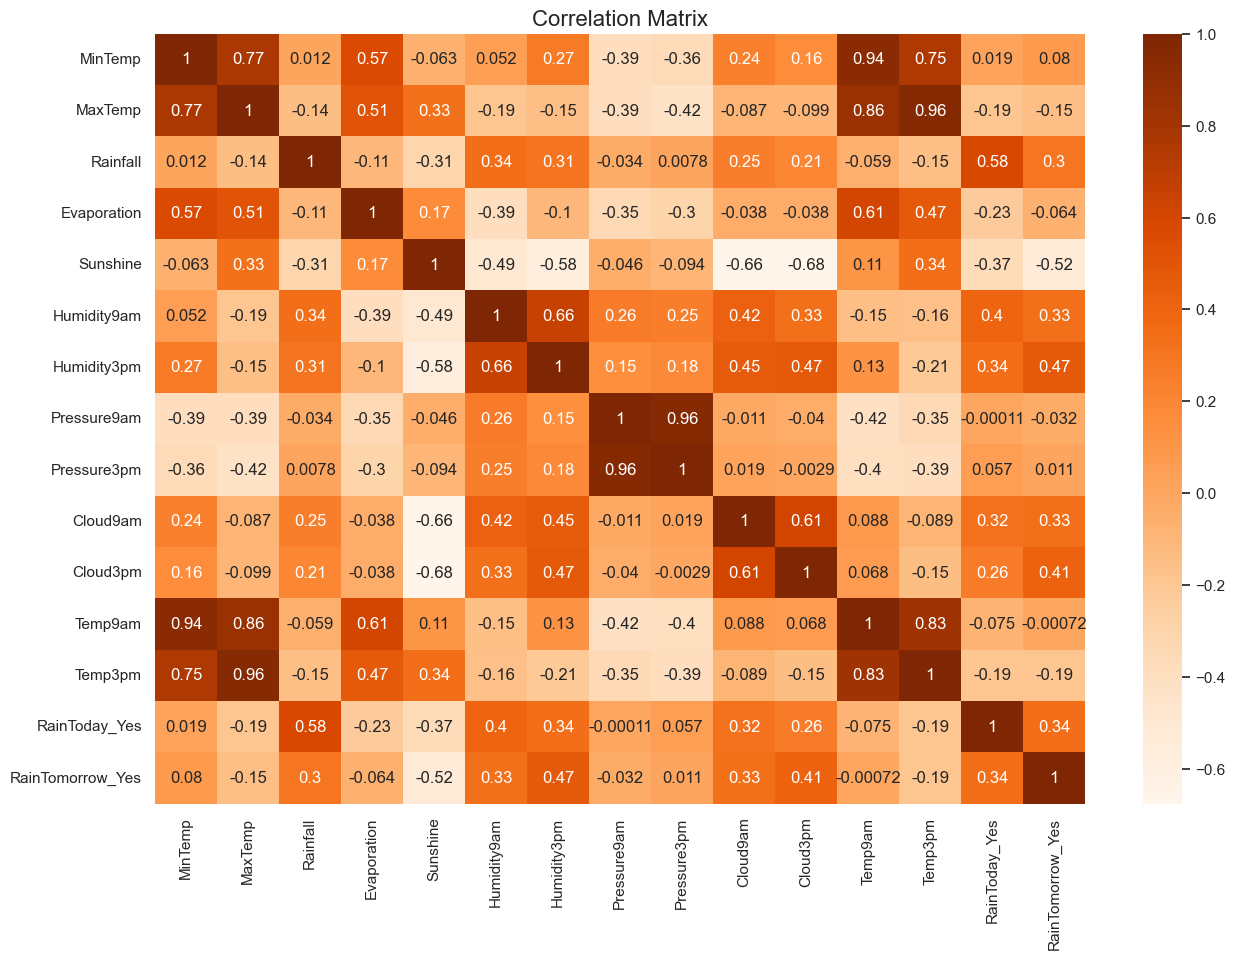

In [835]:
sns.set(rc={'figure.figsize' : (15, 10)})    #sets figure size
sns.heatmap(df.corr(), annot = True, cmap='Oranges')
plt.title('Correlation Matrix', fontsize=16)

***This correlation heatmap shows nothing that can be termed as surprising because the features with strong correlations (either positive or negative) have intuitive reasons for being so.***

## Train-test Split
*******************************

To see the actual performance of the model, we perform train-test split. Here, the dataset is split into two parts- 80% data for training the model and rest 20% unseen data to test the model's performance. It shows us whether our model can work on unseen data as well or not and if it is overfitted/ underfitted by checking the accuracies of training and testing data. We do this by creating X and Y variables first to separate predictors and the response. Then we create 4 dataframes, 2 of training and 2 of test set containing the splitted dataset.

In [836]:
#create X and y variables
#1st argument for rows, since we want all rows, put : and 2nd argument for columns & we want all columns except 'RainTomorrow_Yes'
X = df.loc[:, df.columns != 'RainTomorrow_Yes']  
y = df['RainTomorrow_Yes']

In [837]:
X.shape   #original DataFrame had 15 columns, now X contains only predictor variables

(3337, 14)

In [838]:
#define 4 variables- dependent and independent train and test variables
#train_test_split function returns 4 dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

#20% data for testing so test_size=0.2 
#random_state=0 to get reproducible results

In [839]:
#check rows and columns count
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print('Train size:', X_train.shape)
print('Test size: ', X_test.shape)

Train size: (2669, 14)
Test size:  (668, 14)


***We see that the `X_train` and `X_test` dataframes contain 80% and 20% of the whole dataset respectively.***

## Model Building
*********************************

We had to use classification models for the task. The available ML classification models that we can use for this are:
- Logistic Regression
- Linear Discriminant Analysis
- KNN Classifier
- Classification Tree
- Bagging Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Ada Boost Classifier
- XG Boost Classifier

We will try each one of the above listed models one by one and find their confusion matrices and accuracy scores along with other performance metrics to compare them.
********************************************************

### Model Evaluation Metrics

The model evaluation metics for classification models that we use to judge how well is the model performing and how accurately, are as follows :

- **Confusion Matrix:** It is a table that shows the number of correct and incorrect predictions made by the model compared with the actual classifications in the test set or the type of errors that are being made. The columns of the matrix represent the count of actual classifications in the test data while rows represent the count of predicted classifications made by the model. They are further bifurcated into True Negative & True Positive(that match the actual values) and False Positive & False Negative(that do not match the actual values), known as Type-1 and Type-2 errors respectively.

- **Accuracy Score:** It is the ratio of the number of correct predictions(True Positive + True Negative) to the total number of predictions made for a dataset. It ranges between 0 and 1. A value between 0.7 to 0.9 is considered a good accuracy value.

- **Precision Score:** It is the ratio of True Positives to all the positives predicted by the model and measures the percentage of predictions made by the model that are correct.

- **Recall Score:** It is the ratio of true positives to all the positives in your dataset and measures the percentage of relevant data points that were correctly identified by the model.

- **ROC AUC Score:** It is a graph showing the performance of a classification model and visualizes the tradeoff between the True Positive Rate (TPR) and False Positive Rate(FPR) using different decision thresholds (the threshold for deciding whether a prediction is labeled “true” or “false”) for our predictive model. It is used to control the tradeoff between TPR and FPR. Increasing the threshold will generally increase the precision, but a decrease in recall.
**********************************************************

### Logistic Regression

Logistic regression is a supervised machine learning algorithm that is mainly used for binary classification problems. Here we use a logistic function, also known as sigmoid function that takes input as independent variables and produces a probability value between 0 and 1. 

The difference between linear regression and logistic regression is that the output of linear regression gives continuous values that can range between `-∞` to `+∞` while logistic regression predicts the probability that an instance belongs to a given class or not that has probability values between 0 and 1 only.

The sigmoid function has an S-shaped curve bounded between 0 and 1. So if there is an outlined point, the curve immediately changes its slope and covers the outlined points and the curve's shape does not change much. Thus, it helps solve the problem in linear regression as linear regression model is very sensitive to outlying points.

In [840]:
#creating logistic regression object
clf_lr = LogisticRegression()

In [841]:
clf_lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [842]:
#coef_ and intercept_ are attributes of Logistic Regression object
print("Coefficients of Logistic Regression model: \n", clf_lr.coef_)
print("\nIntercept of Logistic Regression model: ", clf_lr.intercept_[0])

Coefficients of Logistic Regression model: 
 [[-0.12199283  0.08903258  0.03400332  0.01683698 -0.20068025  0.00445636
   0.04907349 -0.05868149  0.05466109 -0.06382048  0.19429241  0.03736331
  -0.02274691  0.05704717]]

Intercept of Logistic Regression model:  0.0006938786823758777


*********************************************************
***We will define functions to plot confusion matrices and ROC curves of all the models. The function `evaluate()` defined below will be called for every classification model and it implicitly calls functions `conf_matrix()` and `roc_curve_custom()` to plot the respective plots. Hence, we the output we get contains confusion matrix of the model, classification report including precision and recall score, , ROC curve plot and the training and test accuracy scores.***

***The `ConfusionMatrixDisplay()` and `RocCurveDisplay()` are display objects that create vizualizations for confusion matrix and ROC curve respectively.***

***ConfusionMatrixDisplay() takes confusion matrix as argument and RocCurveDisplay() takes FPR, TPR and AUC as parameters and displays the respective plots for the model object passed as an argument to the evaluate() function.***

In [843]:
sns.set(rc={'figure.figsize' : (6, 5)})  

#function for plotting confusion matrix
def conf_matrix(model, conf):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=model.classes_)
    sns.set(style= 'white')
    disp.plot(cmap='Blues', values_format='d')
    plt.show()

#function for plotting ROC curve    
def roc_curve_custom(model, fpr, tpr, roc_auc):
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    sns.set(style= 'whitegrid')
    disp.plot()
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.title('ROC Curve')
    plt.show()
    
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred, 
             cm=cm, fpr=fpr, tpr=tpr, roc_auc=roc_auc):
    
    #Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, cm)   #calls conf_matrix() function
    print('\n')
    
    #Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))  #generates the classification report of the model
    print('\n')
    
    #ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, fpr, tpr, roc_auc)   #calls roc_curve_custom() function
    print('\n')
    
    #Checking model fitness
    print('Accuracy Scores are:') 
    print('-'*53)
    print('Testing accuracy:', round(accuracy_score(y_test, y_pred), 4))
    print('Training accuracy: ',round(accuracy_score(y_train, model.predict(X_train)), 4)) #true and predicted values of y_train
    print('\n')

In [844]:
y_pred_lr = clf_lr.predict(X_test)  #predicted values of y_test
conf_lr = confusion_matrix(y_test, y_pred_lr)  #true and predicted values of y_test as arguments

# Get predicted probabilities for the positive class
y_probs_lr = clf_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)  
#computes False Positive Rate and True Positive Rate of the model
#'_'- array containing the thresholds used for computing FPR and TPR
#roc_curve()- sorts the predicted probabilities and computes TPR and FPR for different threshold values.

roc_auc_lr = auc(fpr_lr, tpr_lr)   
#computes AUC
#auc- provides a single scalar value representing performance of binary classification model
#higher the AUC, the better the model discriminates between the positive and negative classes

Confusion Matrix
-----------------------------------------------------


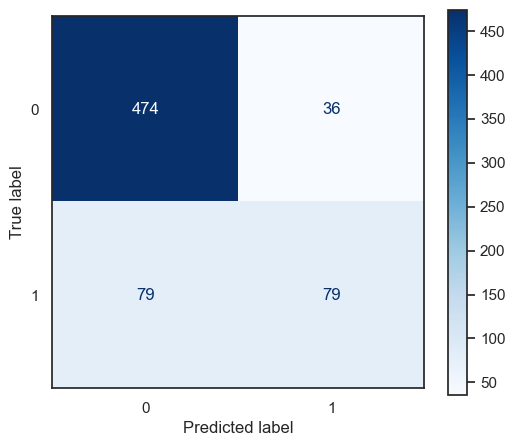



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       510
           1       0.69      0.50      0.58       158

    accuracy                           0.83       668
   macro avg       0.77      0.71      0.74       668
weighted avg       0.82      0.83      0.82       668



ROC Curve
-----------------------------------------------------


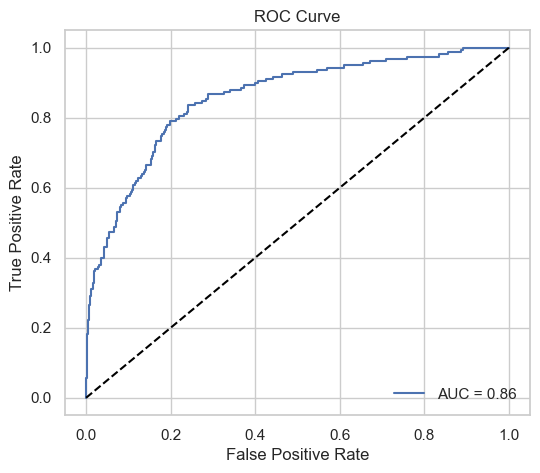



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8278
Training accuracy:  0.8314




In [845]:
evaluate(clf_lr, y_pred=y_pred_lr, cm=conf_lr, fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr)

### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset. This model is more preferred over Logistic Regression when we have more than 2 classes and is based on Bayes theorem.

LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that will maximize the ratio of between-class variance to within-class variance. Hence, it finds the directions in the feature space that best separate the different classes of data.

It assumes that the continuous variables are normally distributed. If this assumption holds true, LDA's predictability becomes very high.

In [846]:
#LDA object
clf_lda = LinearDiscriminantAnalysis()

In [847]:
clf_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [848]:
y_pred_lda = clf_lda.predict(X_test)
conf_lda = confusion_matrix(y_test, y_pred_lda)   #true and predicted values of y as arguments

# Get predicted probabilities for the positive class
y_probs_lda = clf_lda.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_probs_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

Confusion Matrix
-----------------------------------------------------


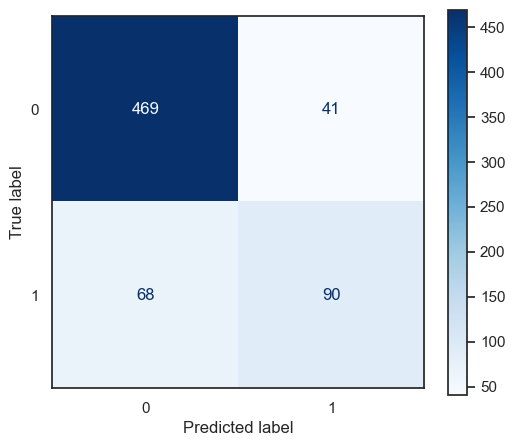



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       510
           1       0.69      0.57      0.62       158

    accuracy                           0.84       668
   macro avg       0.78      0.74      0.76       668
weighted avg       0.83      0.84      0.83       668



ROC Curve
-----------------------------------------------------


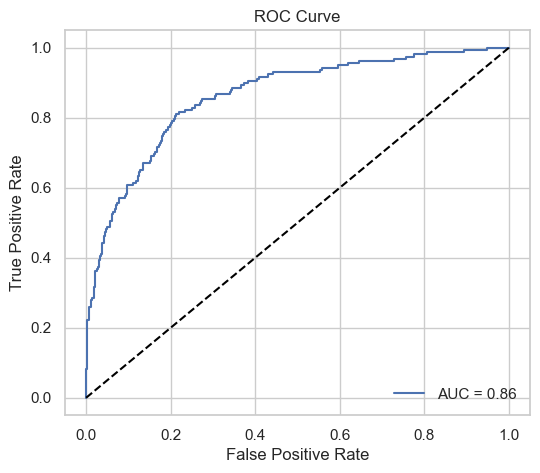



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8368
Training accuracy:  0.8295




In [849]:
evaluate(clf_lda, y_pred=y_pred_lda, cm=conf_lda, fpr=fpr_lda, tpr=tpr_lda, roc_auc=roc_auc_lda)   
#model object passed as parameter along with other parameters

### K-Nearest Neighbors (KNN)

The K-nearest neighbors algorithm (KNN) is a supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. This algorithm is based on Bayes theorem too but unlike LDA, it is non-parametric, i.e. does not assume a functional form of the relationship.

KNN works by looking at the K closest points to the given data point and picks the class that occurs the most to be the predicted value. It works best when we can identify clusters of points in our data set and when we have a non-linear boundary around the data points. 

If the assumption of normal distribution of continuous variables does not stand well, we can use KNN for a better performance.

In [850]:
#scaler object that will store the scaling information for X variable
scaler = StandardScaler()

#transforming X_train and X_test so that it can create scaled variables

#using fit_transform() on X_train to both fit and transform it
#using transform() on X_test because we can't use fit() on test data as it may introduce bias in test data
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [851]:
X_test_s
#all variables are in a small range of values now
#standardizing means converting mean of all values of the variable to 0 and SD to 1 

array([[-0.56765213, -0.61658297, -0.33549043, ..., -0.18849537,
        -0.60418541, -0.59913379],
       [-0.01961597,  0.60373884, -0.35717006, ..., -0.24959894,
        -0.25720694, -0.59913379],
       [ 0.11191271,  1.0696799 , -0.35717006, ...,  0.70769039,
         1.2926302 , -0.59913379],
       ...,
       [-0.89647383, -0.57220763, -0.35717006, ..., -0.12739179,
        -0.55792161, -0.59913379],
       [ 0.11191271,  1.80187299, -0.35717006, ...,  0.27996537,
         1.94032334, -0.59913379],
       [-1.79525314, -1.26002538, -0.35717006, ..., -1.81792403,
        -1.04369146, -0.59913379]])

In [852]:
clf_knn = KNeighborsClassifier(n_neighbors = 7)   #n_neighbors- parameter 'K' 

In [853]:
clf_knn.fit(X_train_s, y_train)  #using scaled X- variable

KNeighborsClassifier(n_neighbors=7)

In [854]:
y_pred_knn = clf_knn.predict(X_test_s)  #predicted values of y_test
conf_knn = confusion_matrix(y_test, y_pred_knn)

# Get predicted probabilities for the positive class
y_probs_knn = clf_knn.predict_proba(X_test_s)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

Confusion Matrix
-----------------------------------------------------


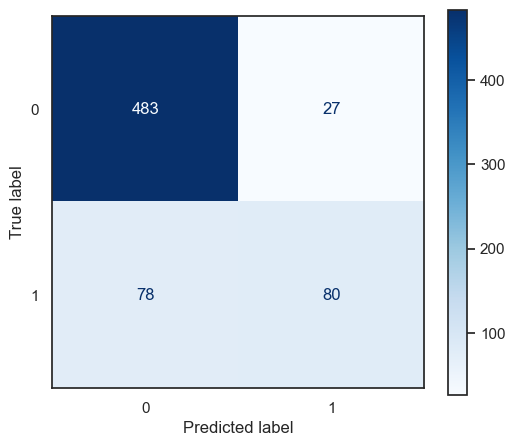



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       510
           1       0.75      0.51      0.60       158

    accuracy                           0.84       668
   macro avg       0.80      0.73      0.75       668
weighted avg       0.83      0.84      0.83       668



ROC Curve
-----------------------------------------------------


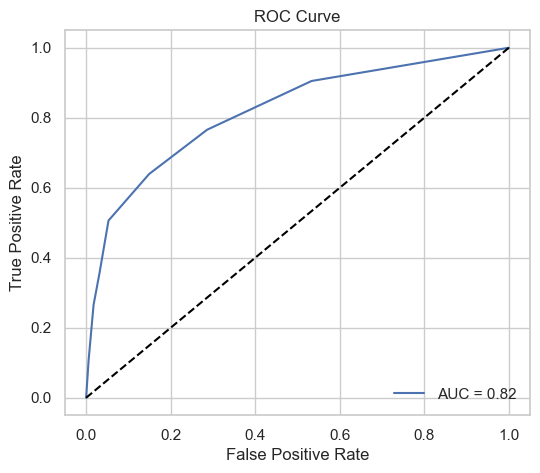



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8428
Training accuracy:  0.8591




In [855]:
evaluate(clf_knn, X_train=X_train_s, X_test=X_test_s, y_pred=y_pred_knn, cm=conf_knn, 
         fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn)

### Classification Tree

A decision tree is one of the most powerful tools of supervised learning algorithms that can be used for both classification and regression tasks. It is basically, a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. 

Decision trees are constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

They are easy to interpret and give clear decision points. A simple decision tree can lack in accuracy , but we can use variants like `Bagging`, `Random Forests` and `Boosting` that can improve accuracy significantly.

In [856]:
#creating Regression tree object
clftree = tree.DecisionTreeClassifier(max_depth = 6)   #max_depth- maximum depth of the tree

In [857]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [858]:
y_pred_tree = clftree.predict(X_test)
conf_tree = confusion_matrix(y_test, y_pred_tree)

# Get predicted probabilities for the positive class
y_probs_tree = clftree.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

Confusion Matrix
-----------------------------------------------------


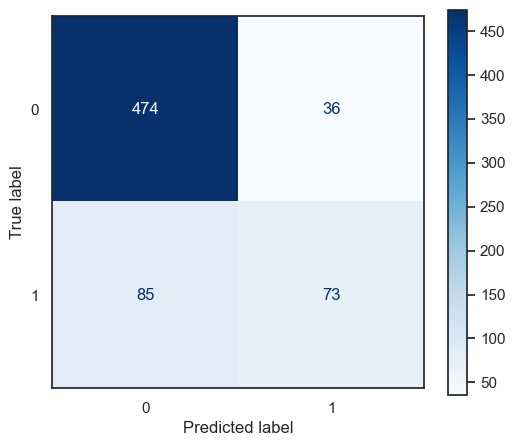



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       510
           1       0.67      0.46      0.55       158

    accuracy                           0.82       668
   macro avg       0.76      0.70      0.72       668
weighted avg       0.81      0.82      0.81       668



ROC Curve
-----------------------------------------------------


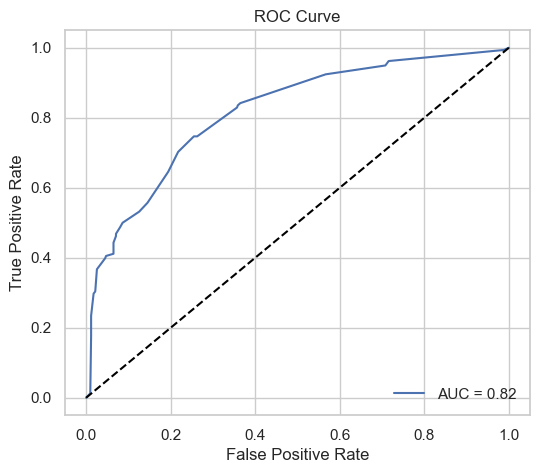



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8189
Training accuracy:  0.8587




In [859]:
evaluate(clftree, y_pred=y_pred_tree, cm=conf_tree, fpr=fpr_tree, tpr=tpr_tree, roc_auc=roc_auc_tree)

***We will create the predicted classification tree below using the `pydotplus` library and creating `dot data` of the tree which is string representation of the input tree in GraphViz dot format.***

In [860]:
#create dot file, convert it into image and use that image to create graph of the decision tree
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names= X_train.columns, filled= True)

#if feature_names are mentioned, column names would be there, not X0,X1 etc
#filled=True fills color according to the mean value of the bucket,i.e. performs conditional formatting

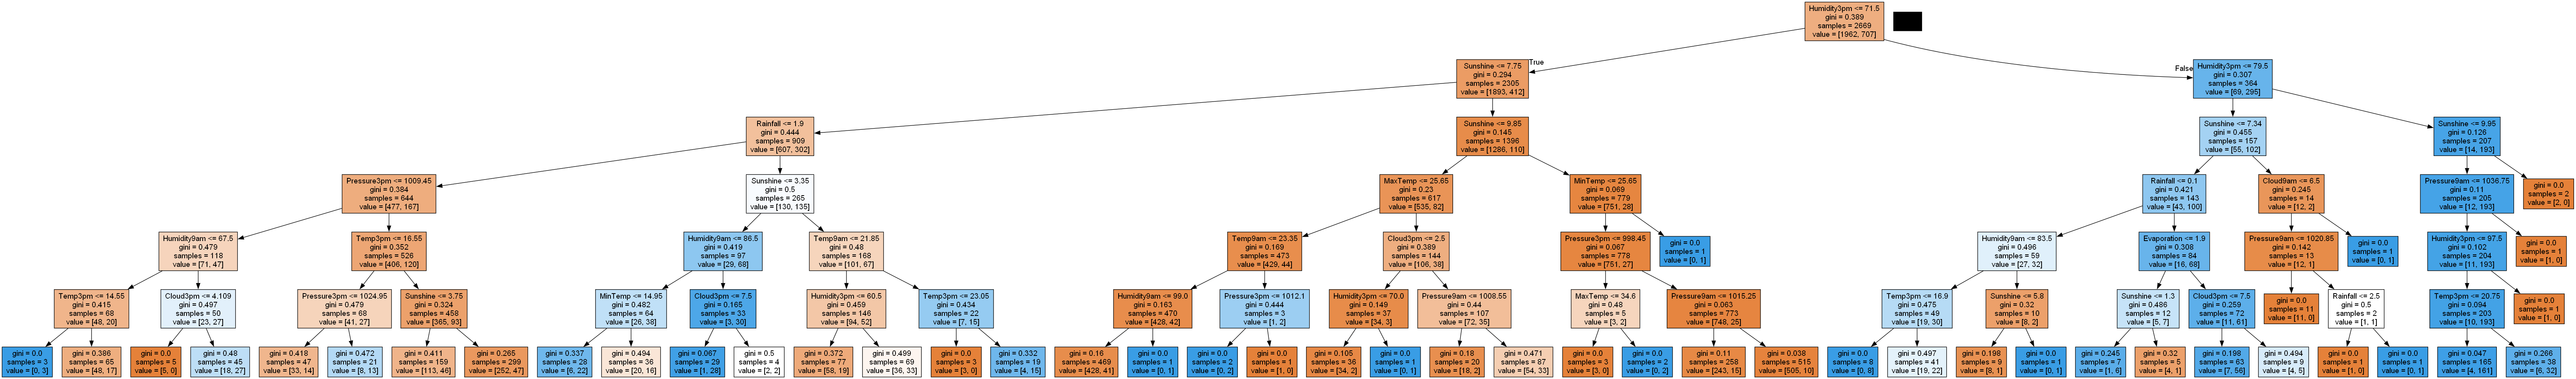

In [861]:
#display graph of the tree
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ensemble Methods

Ensemble methods use multiple learning algorithms to obtain better predictive performance than what could be obtained from any of the constituent learning algorithms alone.

We will try the ensemble learning methods to see if they fit the rainfall data better than the previous ones.
***************************************************

### Bagging

`B`ootstrap `Agg`regating, also known as bagging, is a machine learning ensemble algorithm designed to improve the stability and accuracy of machine learning algorithms used in classification and regression tasks. It decreases the variance and helps to avoid overfitting. It is usually applied to decision tree methods.

Here, we form multiple training sets from the given dataset using all the predictor variables , train the models on them and average the predicted values to get final model prediction.

In [862]:
bag_clf = BaggingClassifier(estimator= clftree, n_estimators= 7000, 
                            bootstrap= True, n_jobs= -1, 
                            random_state= 0)

#n_estimators- number of base estimators (trees) in ensemble
#n_jobs=-1 uses all the processing power of computer, by default n_jobs=1 i.e. only one processor used
#bootstrap- whether samples are drawn with replacement

In [863]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=7000, n_jobs=-1, random_state=0)

In [864]:
y_pred_bag = bag_clf.predict(X_test)
conf_bag = confusion_matrix(y_test, y_pred_bag)

# Get predicted probabilities for the positive class
y_probs_bag = bag_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_probs_bag)
roc_auc_bag = auc(fpr_bag, tpr_bag)

Confusion Matrix
-----------------------------------------------------


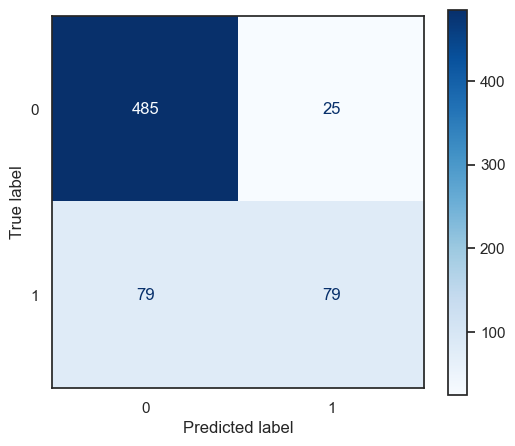



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       510
           1       0.76      0.50      0.60       158

    accuracy                           0.84       668
   macro avg       0.81      0.73      0.75       668
weighted avg       0.84      0.84      0.83       668



ROC Curve
-----------------------------------------------------


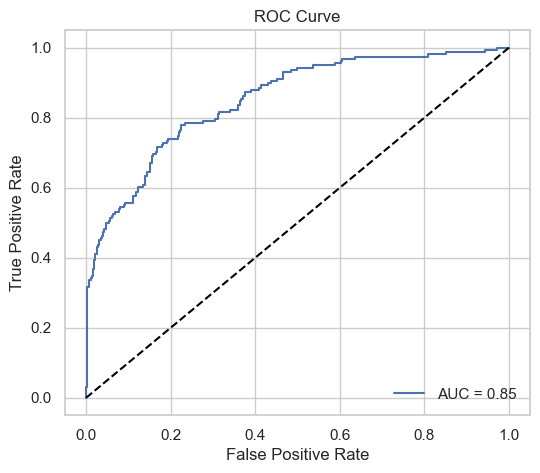



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8443
Training accuracy:  0.8767




In [865]:
evaluate(bag_clf, y_pred=y_pred_bag, cm=conf_bag, fpr=fpr_bag, tpr=tpr_bag, roc_auc=roc_auc_bag)

### Random Forest

Random forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility is makes it versatile, as it handles both classification and regression problems.

The random forest algorithm is an extension of the Bagging method as it utilizes both Bagging and feature randomness to create an uncorrelated forest of decision trees. It works almost like Bagging ensemble, but here we don't use all the predictor variables instead use a subset of them for every dataset sampled from the original one. It helps in reducing bias and reduces overall variance resulting in substantial increase in accuracy of the model.

In [866]:
rf_clf = RandomForestClassifier(max_depth= 7, n_estimators= 5000, n_jobs= -1, random_state= 0)

In [867]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=5000, n_jobs=-1,
                       random_state=0)

In [868]:
y_pred_rf = rf_clf.predict(X_test)
conf_rf = confusion_matrix(y_test, y_pred_rf)

# Get predicted probabilities for the positive class
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Confusion Matrix
-----------------------------------------------------


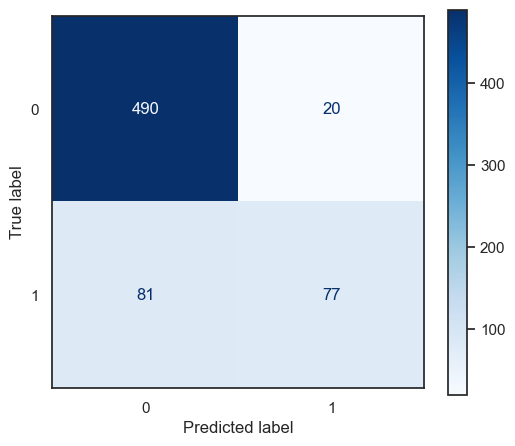



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       510
           1       0.79      0.49      0.60       158

    accuracy                           0.85       668
   macro avg       0.83      0.72      0.76       668
weighted avg       0.84      0.85      0.83       668



ROC Curve
-----------------------------------------------------


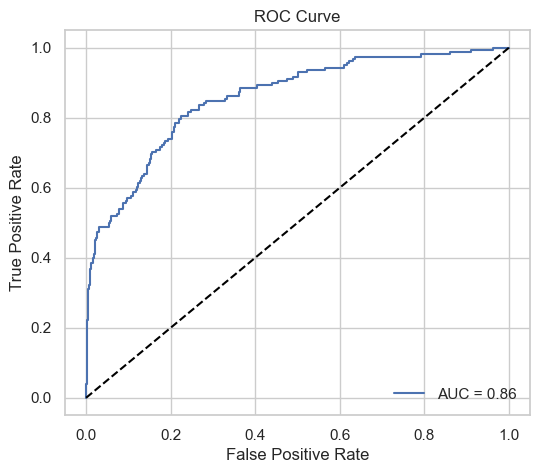



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8488
Training accuracy:  0.8839




In [869]:
evaluate(rf_clf, y_pred=y_pred_rf, cm=conf_rf, fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf)

****************************************************
Hyperparameters are the parameters that are set before training a machine learning model. These parameters can have a significant impact on the performance of a model and need to be carefully chosen. The process of selecting the best hyperparameters is called `hyperparameter tuning`. 

GridSearchCV is a scikit-learn function that automates the hyperparameter tuning process and helps to find the best hyperparameters for a given machine learning model.

***Now, we will use Random Search Classifier in GridSearchCV to perform hyperparameter tuning.***

In [870]:
rf_clf1 = RandomForestClassifier(random_state=0)

In [871]:
#creating a dictionary of parameter values
params_grid = { 'n_estimators': [250,500],
                'max_depth': [None, 5, 10, 15],
               'min_samples_leaf': [1, 2, 4],
               'max_features': [2, 3], 
               'min_samples_split': [2,3,10]}

#max_features- number of features to consider when looking for the best split
#min_samples_split- minimum number of samples required to split an internal node
#min_samples_leaf- minimum number of samples required to be at a leaf node.

In [872]:
grid_search = GridSearchCV(rf_clf1, params_grid, n_jobs= -1, cv= 3, scoring='accuracy')   
#passing the dictionary as parameter

In [873]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15], 'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250, 500]},
             scoring='accuracy')

In [874]:
#parameters of the best model
grid_search.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 250}

In [875]:
#information of the best model to predict values of test data
cvrf_clf1 = grid_search.best_estimator_

In [876]:
y_pred_cvrf = cvrf_clf1.predict(X_test)
conf_cvrf = confusion_matrix(y_test, y_pred_cvrf)

# Get predicted probabilities for the positive class
y_probs_cvrf = cvrf_clf1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_cvrf, tpr_cvrf, _ = roc_curve(y_test, y_probs_cvrf)
roc_auc_cvrf = auc(fpr_cvrf, tpr_cvrf)

Confusion Matrix
-----------------------------------------------------


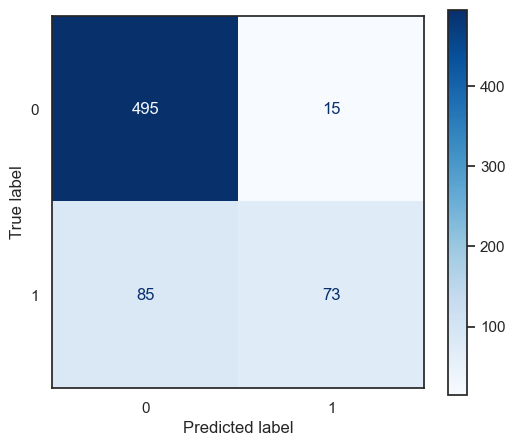



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       510
           1       0.83      0.46      0.59       158

    accuracy                           0.85       668
   macro avg       0.84      0.72      0.75       668
weighted avg       0.85      0.85      0.83       668



ROC Curve
-----------------------------------------------------


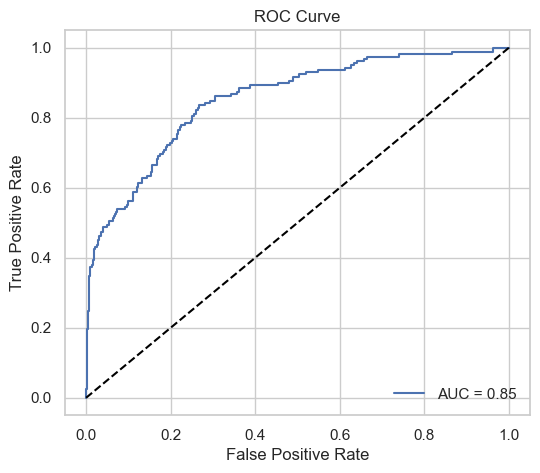



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8503
Training accuracy:  0.8505




In [877]:
evaluate(cvrf_clf1, y_pred=y_pred_cvrf, cm=conf_cvrf, fpr=fpr_cvrf, tpr=tpr_cvrf, roc_auc=roc_auc_cvrf)

### Gradient Boosting

Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. The three types of boosting techniques are `Gradient Boost`, `Ada Boost` & `XG Boost`.

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. 

It is a slow learning procedure where we fit the model using the current residuals rather than the outcome as response. The learning rate is the shrinkage parameter that controls how fast or slow your model learns. If value of it is less, the model learns even more slowly.

In [878]:
gbc_clf = GradientBoostingClassifier(learning_rate= 0.005, n_estimators= 2000, max_depth= 3)
#learning_rate- shrinks the contrution of each tree by that value (shrinkage parameter)

In [879]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.005, n_estimators=2000)

In [880]:
y_pred_gbc = gbc_clf.predict(X_test)
conf_gbc = confusion_matrix(y_test, y_pred_gbc)

# Get predicted probabilities for the positive class
y_probs_gbc = gbc_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_probs_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

Confusion Matrix
-----------------------------------------------------


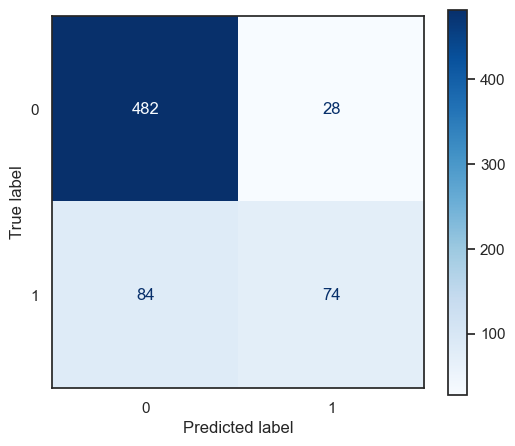



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       510
           1       0.73      0.47      0.57       158

    accuracy                           0.83       668
   macro avg       0.79      0.71      0.73       668
weighted avg       0.82      0.83      0.82       668



ROC Curve
-----------------------------------------------------


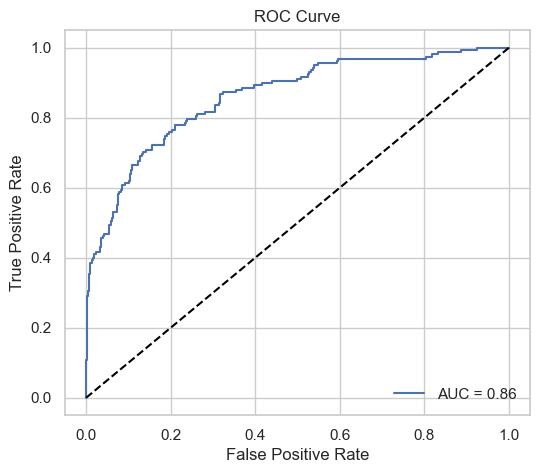



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8323
Training accuracy:  0.8775




In [881]:
evaluate(gbc_clf, y_pred=y_pred_gbc, cm=conf_gbc, fpr=fpr_gbc, tpr=tpr_gbc, roc_auc=roc_auc_gbc)

***Now, we will use Gradient Boosting Classifier in GridSearchCV to perform hyperparameter tuning.***

In [882]:
gbc_clf1 = GradientBoostingClassifier()

In [883]:
params_grid_gbc = {
    'n_estimators': [50, 100, 200],      #number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],    #step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],                
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

In [884]:
grid_search_gbc = GridSearchCV(gbc_clf1,params_grid_gbc, n_jobs= -1, cv=3, scoring='accuracy')
grid_search_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [885]:
grid_search_gbc.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [886]:
cvgbc_clf1= grid_search_gbc.best_estimator_

In [887]:
y_pred_cvgbc = cvgbc_clf1.predict(X_test)
conf_cvgbc = confusion_matrix(y_test, y_pred_cvgbc)

# Get predicted probabilities for the positive class
y_probs_cvgbc = cvgbc_clf1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_cvgbc, tpr_cvgbc, _ = roc_curve(y_test, y_probs_cvgbc)
roc_auc_cvgbc = auc(fpr_cvgbc, tpr_cvgbc)

Confusion Matrix
-----------------------------------------------------


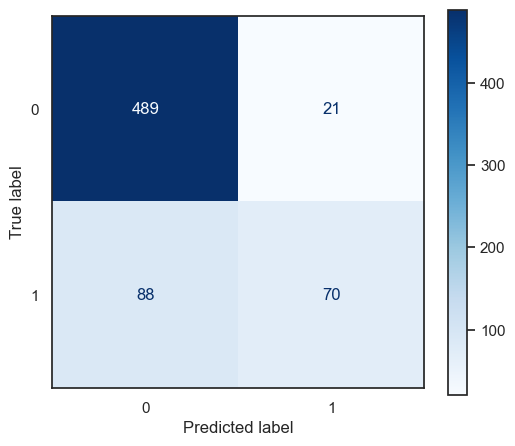



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       510
           1       0.77      0.44      0.56       158

    accuracy                           0.84       668
   macro avg       0.81      0.70      0.73       668
weighted avg       0.83      0.84      0.82       668



ROC Curve
-----------------------------------------------------


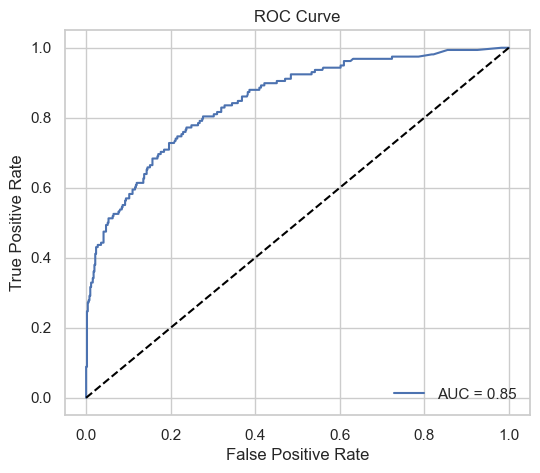



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8368
Training accuracy:  0.8528




In [888]:
evaluate(cvgbc_clf1, y_pred=y_pred_cvgbc, cm=conf_cvgbc, fpr=fpr_cvgbc, tpr=tpr_cvgbc, roc_auc=roc_auc_cvgbc)

### Ada Boost

Ada Boost or `Adaptive Boosting` is an iterative ensemble method that combines multiple classifiers to increase the accuracy of classifiers. It builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. 

Adaboost works by setting the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier in Ada Boost if it accepts weights on the training set. 

In [889]:
ada_clf = AdaBoostClassifier(learning_rate= 0.005, n_estimators= 1000)

In [890]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.005, n_estimators=1000)

In [891]:
y_pred_ada = ada_clf.predict(X_test)
conf_ada = confusion_matrix(y_test, y_pred_ada)

# Get predicted probabilities for the positive class
y_probs_ada = ada_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_probs_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

Confusion Matrix
-----------------------------------------------------


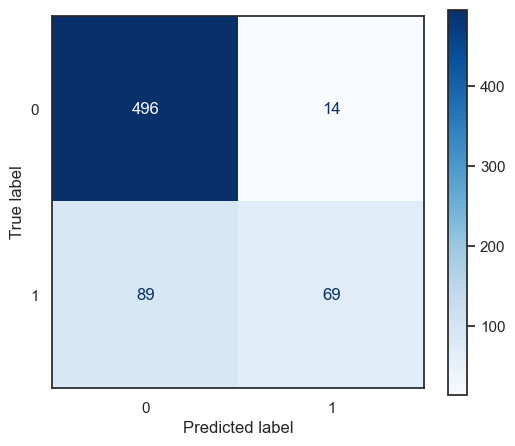



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       510
           1       0.83      0.44      0.57       158

    accuracy                           0.85       668
   macro avg       0.84      0.70      0.74       668
weighted avg       0.84      0.85      0.83       668



ROC Curve
-----------------------------------------------------


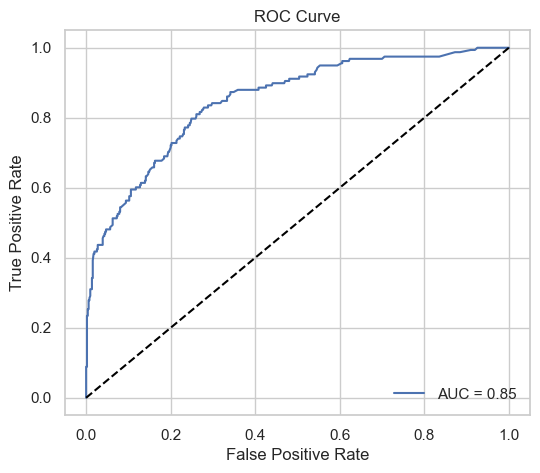



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8458
Training accuracy:  0.8348




In [892]:
evaluate(ada_clf, y_pred=y_pred_ada, cm=conf_ada, fpr=fpr_ada, tpr=tpr_ada, roc_auc=roc_auc_ada)

***Now, we will use Ada Boost Classifier in GridSearchCV to perform hyperparameter tuning.***

In [893]:
ada_clf1 = AdaBoostClassifier()

In [894]:
params_grid_ada = {
    'n_estimators': [50, 100, 200],      #number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2]}    #step size shrinkage to prevent overfitting         

In [895]:
grid_search_ada = GridSearchCV(ada_clf1,params_grid_ada, n_jobs= -1, cv=3, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [896]:
grid_search_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [897]:
cvada_clf1= grid_search_ada.best_estimator_

In [898]:
y_pred_cvada = cvada_clf1.predict(X_test)
conf_cvada = confusion_matrix(y_test, y_pred_cvada)

# Get predicted probabilities for the positive class
y_probs_cvada = cvada_clf1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_cvada, tpr_cvada, _ = roc_curve(y_test, y_probs_cvada)
roc_auc_cvada = auc(fpr_cvada, tpr_cvada)

Confusion Matrix
-----------------------------------------------------


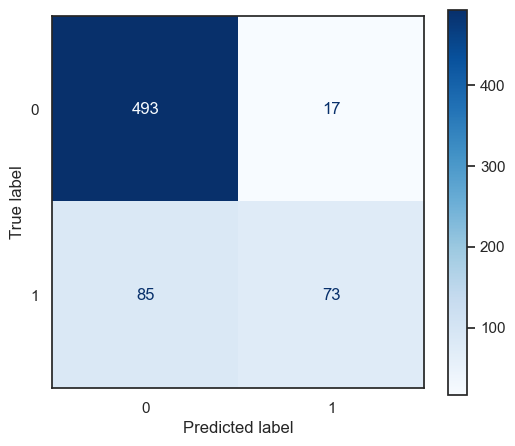



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       510
           1       0.81      0.46      0.59       158

    accuracy                           0.85       668
   macro avg       0.83      0.71      0.75       668
weighted avg       0.84      0.85      0.83       668



ROC Curve
-----------------------------------------------------


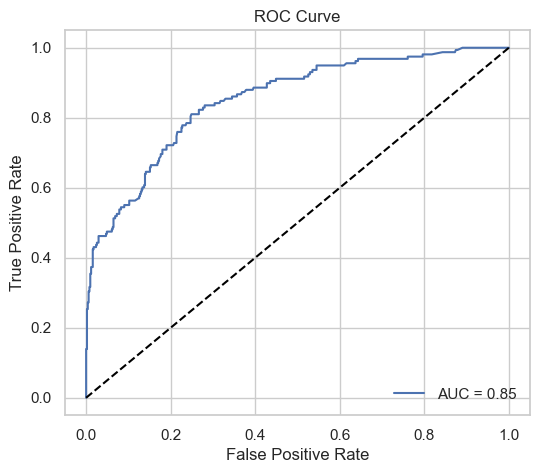



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8473
Training accuracy:  0.8419




In [899]:
evaluate(cvada_clf1, y_pred=y_pred_cvada, cm=conf_cvada, fpr=fpr_cvada, tpr=tpr_cvada, roc_auc=roc_auc_cvada)

### XG Boost

XGBoost, which stands for `Extreme Gradient Boosting`, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library used for regression, classification, and ranking problems. It provides parallel tree boosting & can handle missing values, and is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.  
XGBoost works by training a number of decision trees. Each tree is trained on a subset of the data, and the predictions from each tree are combined to form the final prediction.

It is an improvement on the GBM i.e. gradient boosting algorithm. The main difference is that XGBoost uses a more regularized model, which helps to prevent overfitting.

In [900]:
xgb_clf = xgb.XGBClassifier(max_depth= 2, n_estimators= 10000, learning_rate= 0.001,
                           n_jobs= -1)

In [901]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [902]:
y_pred_xgb = xgb_clf.predict(X_test)
conf_xgb = confusion_matrix(y_test, y_pred_xgb)

# Get predicted probabilities for the positive class
y_probs_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

Confusion Matrix
-----------------------------------------------------


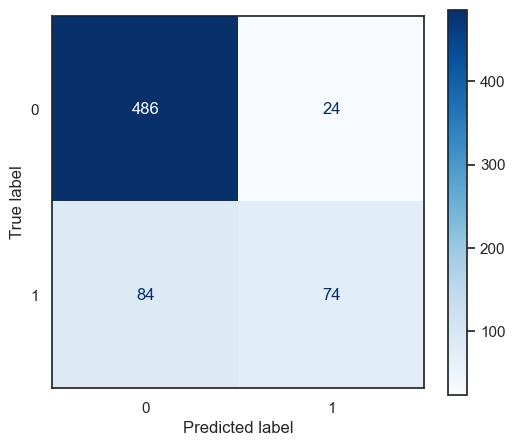



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       510
           1       0.76      0.47      0.58       158

    accuracy                           0.84       668
   macro avg       0.80      0.71      0.74       668
weighted avg       0.83      0.84      0.82       668



ROC Curve
-----------------------------------------------------


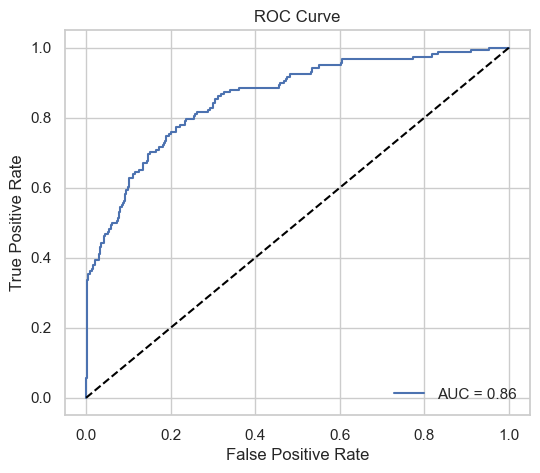



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8383
Training accuracy:  0.8498




In [903]:
evaluate(xgb_clf, y_pred=y_pred_xgb, cm=conf_xgb, fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

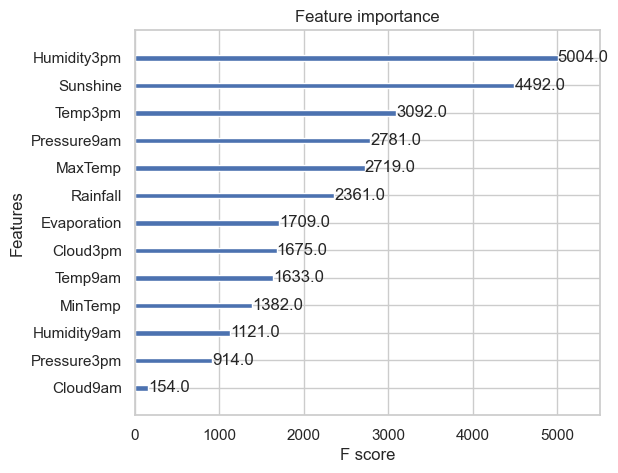

In [904]:
sns.set(style = 'whitegrid')
xgb.plot_importance(xgb_clf)
#plotting a graph of relative importance of all predictor variables used for model

***Now, we will use XG Boost Classifier in GridSearchCV to perform hyperparameter tuning.***

In [905]:
xgb_clf1 = xgb.XGBClassifier()

In [906]:
params_grid_xgb = {
    'n_estimators': [50, 100, 200],      #number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2]}    #step size shrinkage to prevent overfitting         

In [907]:
grid_search_xgb = GridSearchCV(xgb_clf1,params_grid_xgb, n_jobs= -1, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [908]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [909]:
cvxgb_clf1= grid_search_xgb.best_estimator_

In [910]:
y_pred_cvxgb = cvxgb_clf1.predict(X_test)
conf_cvxgb = confusion_matrix(y_test, y_pred_cvxgb)

# Get predicted probabilities for the positive class
y_probs_cvxgb = cvxgb_clf1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_cvxgb, tpr_cvxgb, _ = roc_curve(y_test, y_probs_cvxgb)
roc_auc_cvxgb = auc(fpr_cvxgb, tpr_cvxgb)

Confusion Matrix
-----------------------------------------------------


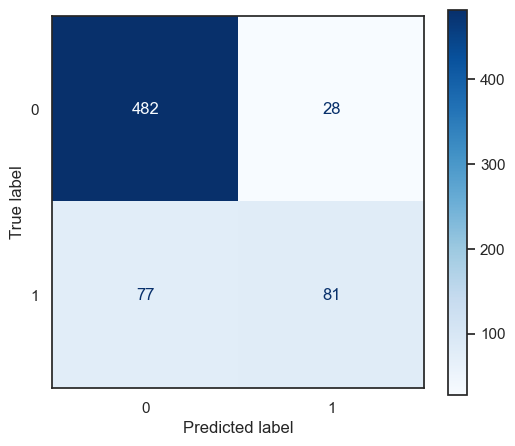



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       510
           1       0.74      0.51      0.61       158

    accuracy                           0.84       668
   macro avg       0.80      0.73      0.75       668
weighted avg       0.83      0.84      0.83       668



ROC Curve
-----------------------------------------------------


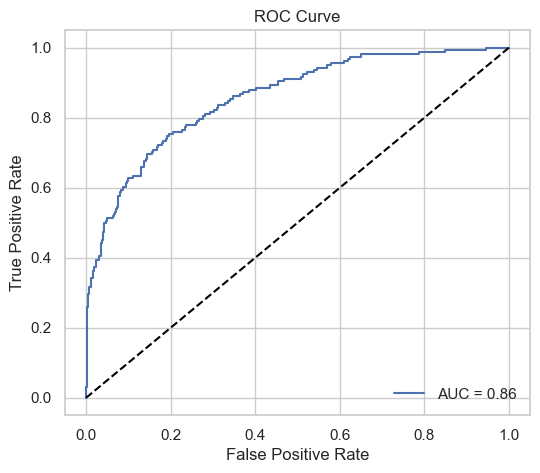



Accuracy Scores are:
-----------------------------------------------------
Testing accuracy: 0.8428
Training accuracy:  0.9149




In [911]:
evaluate(cvxgb_clf1, y_pred=y_pred_cvxgb, cm=conf_cvxgb, fpr=fpr_cvxgb, tpr=tpr_cvxgb, roc_auc=roc_auc_cvxgb)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

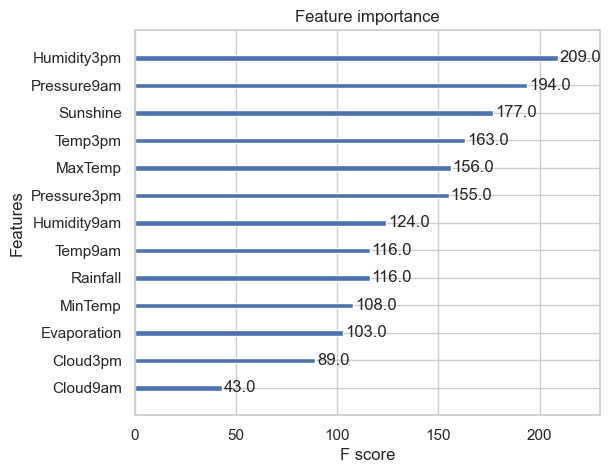

In [912]:
sns.set(style = 'whitegrid')
xgb.plot_importance(cvxgb_clf1)

## Model Evaluation

***In the below bar plot, we plot the accuracies of all the classification models we used for the project.***

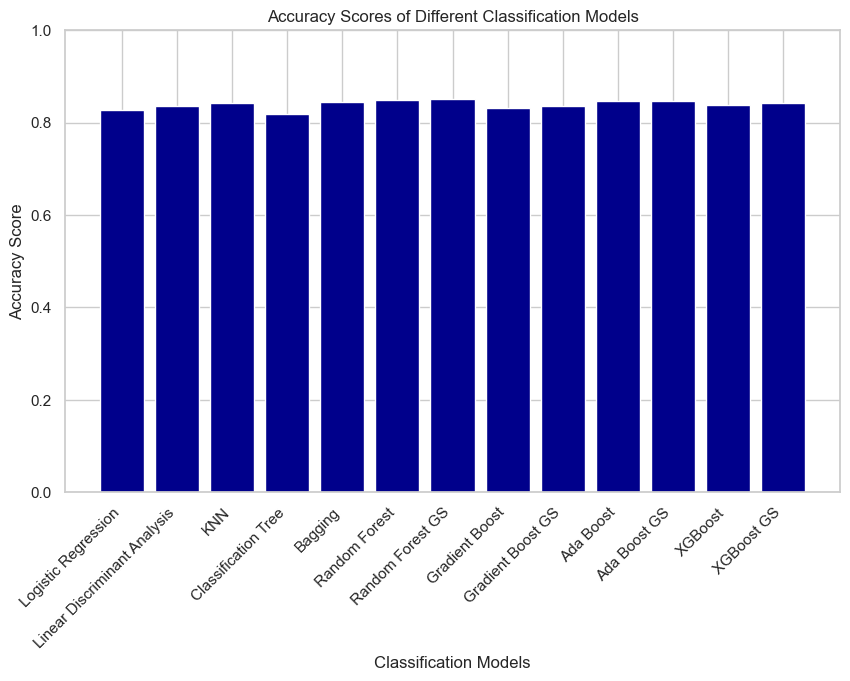

In [913]:
#list of model objects
models = [clf_lr, clf_lda, clf_knn, clftree, bag_clf, rf_clf, cvrf_clf1, gbc_clf,
          cvgbc_clf1, ada_clf, cvada_clf1, xgb_clf, cvxgb_clf1]

#list of predicted values of y_test from each model
predicted_val = [y_pred_lr, y_pred_lda, y_pred_knn, y_pred_tree, y_pred_bag, y_pred_rf, 
              y_pred_cvrf, y_pred_gbc, y_pred_cvgbc, y_pred_ada, y_pred_cvada, y_pred_xgb, y_pred_cvxgb]

#model names to display
model_names = ['Logistic Regression', 'Linear Discriminant Analysis', 'KNN', 'Classification Tree', 'Bagging', 
               'Random Forest', 'Random Forest GS', 'Gradient Boost', 'Gradient Boost GS', 
              'Ada Boost', 'Ada Boost GS','XGBoost', 'XGBoost GS']
         
#creating lists to append model names and accuracy values 
accuracy = []
model_name = []

# Calculate accuracy scores for each model and append to lists
for model, predicted_values in zip(models, predicted_val):
    accuracy_values = accuracy_score(y_test, predicted_values)
    accuracy.append(accuracy_values)
    model_name.append(type(model).__name__)  # Get the name of the model class
    
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy, color='darkblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classification Models')
plt.ylim(0, 1)  #set the y-axis limit to represent accuracy percentage
plt.xticks(rotation=45, ha='right')  #rotate x-axis labels for better visibility
plt.show()

After trying out all the available classification models and finding their individual accuracies, we can clearly see that the `Random Forest Classifier` used with GridSearchCV for multiple parameters namely, {'max_depth': 5,'max_features': 3,'min_samples_leaf': 4,'min_samples_split': 10,'n_estimators': 250} has the highest test accuracy score, `0.8503` among the rest of the models.

Also, Random Forest Classifier with single parameters has the second highest test accuracy score, i.e. `0.8488`.

Hence, Random Forest ensemble method works best for our prediction problem of rainfall data.

The reasons behind it can be :

- Random forest is a powerful Machine Learning technique that has the capability to capture non-linear relationships in the data. Rainfall patterns can be influenced by complex interactions among various meteorological factors, and Random Forest is capable of capturing these non-linearities, quite effectively at that.

- It is an ensemble method of combining multiple decision trees. Each tree is trained on a random subset of the data and features, reducing the risk of overfitting. It does that by training a large number of shallow trees and combining their predictions which leads to accurate results. 

- Random Forest can handle imbalanced datasets well and our rainfall data was imbalanced, i.e. there were more number of non-rainy days than rainy ones. Also, it is robust to outliers and noise in the data. In real-world meteorological datasets, there may be outliers or noise due to various measurement errors or errors due to failure of forescasting tools, and Random Forest can handle these situations better than some other models.

- The parameters of Random Forest Classifier were optimized by GridSearchCV technique to test against multiple values and find the best combination of hyperparameters that give the highest accuracy. This hyperparameter tuning could also be contributing towards the model performing better than the other used classification models. 
*************************************************************

To improve this selected model’s performance even further, the below steps can be taken :

- **Feature Engineering:** It means transforming some variables, creating new features from the already present ones or removing irrelevant features, that can provide meaningful insights for the model and better capture patterns in the rainfall data.
- **Cross-Validation:** Different cross-validation methods can be applied on the model to improve accuracy like changing the value of `cv` i.e. the cross-validation parameter to check for increasing accuracy values or applying strattified K-fold method especially useful for our imbalance rainfall data.
- **Hyperparameter Tuning:** Experimenting with different values of hyperparameters and optimizing them further can lead to increased accuracy of the model, also, can include other parameters as well to see their effect on the same. We can also implement RandomizedSearchCV that randomly selects subsets of parameters, which can lead to a more generalized model prediction.
- **Shuffling dataset:** We can shuffle our dataset by using different `random_state` values and adding `shuffle=True` to ensure that the model is not biased towards just one set of data and can make predictions on randomly shuffled data as well, which will ultimately enhance the predictablity and variance of the model.